# Retina and Lateral Geniculate Nucleus (LGN)

## Overview

Welcome to the first section of our Visual Neuroscience module! In this notebook, we'll explore the earliest stages of visual processing: the retina and the lateral geniculate nucleus (LGN). These structures form the foundation of visual motion perception by transforming light into neural signals and performing initial processing before information reaches the visual cortex.

### What we'll cover:
- Structure and function of the retina
- ON and OFF center-surround receptive fields
- Temporal properties of retinal ganglion cells
- Organization and function of the LGN
- Magnocellular vs. parvocellular pathways
- Connection to motion processing

## Setting Up

Let's import the libraries we'll need for this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, cm
from mpl_toolkits.mplot3d import Axes3D
import scipy.signal as signal
import sys

# Add the utils package to the path
sys.path.append('../../..')
try:
    from motionenergy.utils import stimuli_generation, visualization
except ImportError:
    print("Note: utils modules not found. This is expected if you haven't implemented them yet.")

# For interactive plots
%matplotlib inline
from IPython.display import HTML, display

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## 1. The Retina: From Light to Neural Signals

The retina is a thin layer of neural tissue lining the back of the eye. It's responsible for converting light into neural signals that can be processed by the brain. Despite its peripheral location, the retina is actually an extension of the central nervous system and performs sophisticated processing on visual information.

### Retinal Organization

The retina consists of several layers of neurons:

1. **Photoreceptors (rods and cones)**: Convert light into electrical signals
2. **Bipolar cells**: Connect photoreceptors to ganglion cells
3. **Horizontal cells**: Provide lateral inhibition between photoreceptors
4. **Amacrine cells**: Provide lateral connections between bipolar and ganglion cells
5. **Ganglion cells**: Output neurons that send information to the brain via the optic nerve

Let's visualize this structure:

AttributeError: module 'matplotlib.pyplot' has no attribute 'Ellipse'

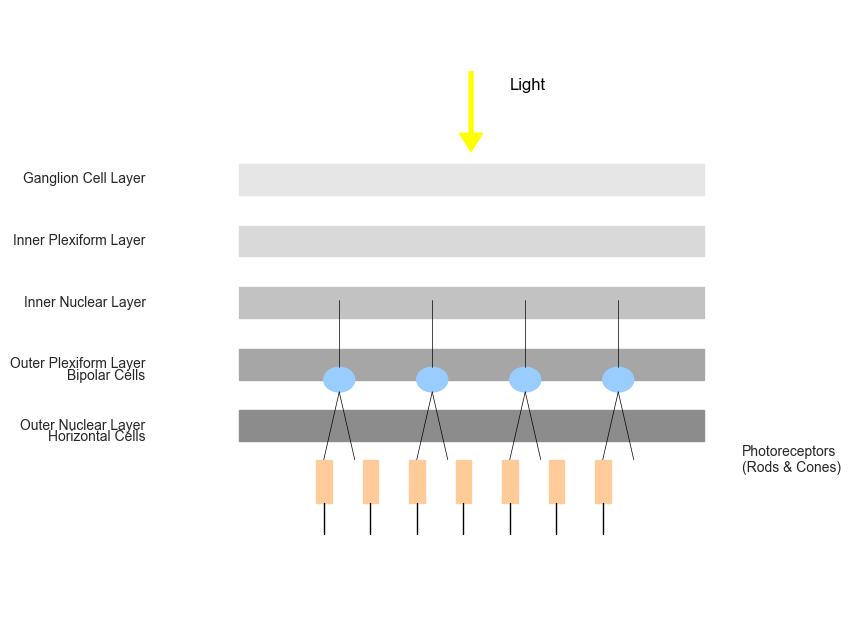

In [2]:
def draw_retina_diagram():
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    # Light direction
    ax.arrow(5, 9, 0, -1, head_width=0.3, head_length=0.3, fc='yellow', ec='yellow', width=0.05)
    ax.text(5.5, 8.7, 'Light', fontsize=12, color='black')
    
    # Retinal layers
    layer_colors = ['#e6e6e6', '#d9d9d9', '#c2c2c2', '#a6a6a6', '#8c8c8c']
    layer_names = ['Ganglion Cell Layer', 'Inner Plexiform Layer', 'Inner Nuclear Layer', 'Outer Plexiform Layer', 'Outer Nuclear Layer']
    
    for i, (color, name) in enumerate(zip(layer_colors, layer_names)):
        y_pos = 7 - i
        ax.add_patch(plt.Rectangle((2, y_pos), 6, 0.5, color=color))
        ax.text(0.8, y_pos+0.25, name, fontsize=10, ha='right', va='center')
    
    # Cell types
    # Photoreceptors
    ax.text(8.5, 2.5, 'Photoreceptors\n(Rods & Cones)', fontsize=10, ha='left')
    for i in range(7):
        x_pos = 3 + i * 0.6
        ax.add_patch(plt.Rectangle((x_pos, 2), 0.2, 0.7, color='#ffcc99'))
        ax.plot([x_pos+0.1, x_pos+0.1], [2, 1.5], 'k-', lw=1)
    
    # Bipolar cells
    ax.text(0.8, 4, 'Bipolar Cells', fontsize=10, ha='right')
    for i in range(4):
        x_pos = 3.3 + i * 1.2
        ax.add_patch(plt.Circle((x_pos, 4), 0.2, color='#99ccff'))
        # Connections to photoreceptors
        ax.plot([x_pos, x_pos-0.2], [3.8, 2.7], 'k-', lw=0.5)
        ax.plot([x_pos, x_pos+0.2], [3.8, 2.7], 'k-', lw=0.5)
        # Connections to ganglion cells
        ax.plot([x_pos, x_pos], [4.2, 5.3], 'k-', lw=0.5)
    
    # Horizontal cells
    ax.text(0.8, 3, 'Horizontal Cells', fontsize=10, ha='right')
    ax.add_patch(plt.Ellipse((5, 3), 4, 0.3, color='#ffff99'))
    # Connections
    for i in range(7):
        x_pos = 3 + i * 0.6 + 0.1
        ax.plot([x_pos, x_pos], [2.7, 3], 'k-', lw=0.5)
    
    # Amacrine cells
    ax.text(0.8, 5, 'Amacrine Cells', fontsize=10, ha='right')
    ax.add_patch(plt.Ellipse((5, 5), 4, 0.3, color='#cc99ff'))
    
    # Ganglion cells
    ax.text(0.8, 6, 'Ganglion Cells', fontsize=10, ha='right')
    for i in range(3):
        x_pos = 3.6 + i * 1.6
        ax.add_patch(plt.Circle((x_pos, 6), 0.3, color='#ff9999'))
        # Axons to optic nerve
        ax.plot([x_pos, x_pos], [6.3, 7], 'k-', lw=1)
    
    # Optic nerve
    ax.arrow(5, 7.5, 0, 0.5, head_width=0.3, head_length=0.2, fc='k', ec='k', width=0.05)
    ax.text(5.5, 7.7, 'To Brain\n(Optic Nerve)', fontsize=12)
    
    ax.set_title('Simplified Structure of the Retina', fontsize=16)
    
    return fig

draw_retina_diagram()

### From Phototransduction to Spike Trains

The process of converting light into neural signals involves several steps:

1. **Phototransduction**: When light hits photoreceptors, it triggers a biochemical cascade that changes the cell's membrane potential.
2. **Synaptic transmission**: Photoreceptors signal to bipolar cells.
3. **Lateral processing**: Horizontal and amacrine cells modify signals through lateral inhibition and other mechanisms.
4. **Ganglion cell output**: Bipolar cells activate ganglion cells, which generate action potentials (spikes).

Importantly, this process involves significant transformation of the visual signal. The retina doesn't simply relay pixel values to the brain; it extracts specific features from the visual scene.

## 2. Receptive Fields: The Building Blocks of Visual Processing

One of the key concepts in visual neuroscience is the **receptive field** - the region of visual space that, when stimulated, affects the firing of a particular neuron. In the retina, ganglion cells have receptive fields with a specific organization known as **center-surround**.

### Center-Surround Receptive Fields

Retinal ganglion cells typically have one of two types of receptive field organization:

1. **ON-center cells**: Excited by light in the center of their receptive field and inhibited by light in the surrounding region
2. **OFF-center cells**: Inhibited by light in the center of their receptive field and excited by light in the surrounding region

Let's visualize these receptive field structures:

In [ ]:
def create_center_surround_rf(size=64, center_sigma=3, surround_sigma=10, center_weight=1, surround_weight=0.5, rf_type='ON'):
    """Create a center-surround receptive field."""
    x = np.linspace(-size/2, size/2, size)
    y = np.linspace(-size/2, size/2, size)
    X, Y = np.meshgrid(x, y)
    
    # Create center and surround Gaussians
    center = np.exp(-(X**2 + Y**2) / (2 * center_sigma**2))
    surround = np.exp(-(X**2 + Y**2) / (2 * surround_sigma**2))
    
    # Normalize
    center = center / np.max(center)
    surround = surround / np.max(surround)
    
    # ON-center or OFF-center
    if rf_type == 'ON':
        rf = center_weight * center - surround_weight * surround
    else:  # OFF
        rf = -center_weight * center + surround_weight * surround
    
    return rf

# Create and visualize ON and OFF center-surround receptive fields
rf_on = create_center_surround_rf(rf_type='ON')
rf_off = create_center_surround_rf(rf_type='OFF')

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot 2D receptive fields
im1 = axs[0, 0].imshow(rf_on, cmap='RdBu_r')
axs[0, 0].set_title('ON-Center Receptive Field')
axs[0, 0].axis('off')
plt.colorbar(im1, ax=axs[0, 0], fraction=0.046, pad=0.04)

im2 = axs[0, 1].imshow(rf_off, cmap='RdBu_r')
axs[0, 1].set_title('OFF-Center Receptive Field')
axs[0, 1].axis('off')
plt.colorbar(im2, ax=axs[0, 1], fraction=0.046, pad=0.04)

# Plot 1D cross-sections
center = rf_on.shape[0] // 2
axs[1, 0].plot(rf_on[center, :], 'b-', linewidth=2)
axs[1, 0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axs[1, 0].set_title('ON-Center Receptive Field (Cross-section)')
axs[1, 0].set_xlabel('Position')
axs[1, 0].set_ylabel('Response')

axs[1, 1].plot(rf_off[center, :], 'r-', linewidth=2)
axs[1, 1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axs[1, 1].set_title('OFF-Center Receptive Field (Cross-section)')
axs[1, 1].set_xlabel('Position')
axs[1, 1].set_ylabel('Response')

plt.tight_layout()
plt.show()

### Response Properties of Center-Surround Receptive Fields

The center-surround organization has important functional consequences. These cells respond most strongly to:

1. **Local contrast**: Differences in light intensity between neighboring regions
2. **Edges**: Boundaries between light and dark regions
3. **Small spots**: Objects that fit within the center region

This means that retinal ganglion cells are not simply measuring light intensity; they're detecting local contrast in the visual scene.

Let's simulate the responses of ON-center and OFF-center cells to different visual stimuli:

In [ ]:
def create_stimulus(size=64, stim_type='spot', diameter=10, edge_position=None):
    """Create a visual stimulus."""
    stimulus = np.zeros((size, size))
    center = size // 2
    
    if stim_type == 'spot':
        # Create a spot of light
        for i in range(size):
            for j in range(size):
                if (i - center)**2 + (j - center)**2 < (diameter/2)**2:
                    stimulus[i, j] = 1.0
    
    elif stim_type == 'edge':
        # Create a light-dark edge
        if edge_position is None:
            edge_position = center
        stimulus[:, edge_position:] = 1.0
    
    elif stim_type == 'grating':
        # Create a sine wave grating
        x = np.linspace(-np.pi, np.pi, size)
        y = np.linspace(-np.pi, np.pi, size)
        X, Y = np.meshgrid(x, y)
        freq = 5.0 / size  # spatial frequency
        stimulus = 0.5 + 0.5 * np.sin(2 * np.pi * freq * X * diameter)
    
    return stimulus

def compute_response(stimulus, receptive_field):
    """Compute the response of a cell with the given receptive field to a stimulus."""
    # Convolve the stimulus with the receptive field
    # Using 'same' mode to get an output the same size as input
    response = signal.convolve2d(stimulus, receptive_field, mode='same', boundary='symm')
    
    # Return the response at the center
    center = stimulus.shape[0] // 2
    return response[center, center]

# Create different stimuli
spot_small = create_stimulus(stim_type='spot', diameter=10)
spot_medium = create_stimulus(stim_type='spot', diameter=20)
spot_large = create_stimulus(stim_type='spot', diameter=40)
edge = create_stimulus(stim_type='edge')
grating = create_stimulus(stim_type='grating', diameter=2)  # diameter controls frequency

# Compute responses
stimuli = [spot_small, spot_medium, spot_large, edge, grating]
stim_names = ['Small Spot', 'Medium Spot', 'Large Spot', 'Edge', 'Grating']

responses_on = [compute_response(s, rf_on) for s in stimuli]
responses_off = [compute_response(s, rf_off) for s in stimuli]

# Plot the stimuli and responses
fig, axs = plt.subplots(2, len(stimuli), figsize=(15, 6))

for i, (stim, name) in enumerate(zip(stimuli, stim_names)):
    # Plot stimulus
    axs[0, i].imshow(stim, cmap='gray')
    axs[0, i].set_title(name)
    axs[0, i].axis('off')
    
    # Plot responses
    bar_height = [responses_on[i], responses_off[i]]
    bar_positions = np.arange(2)
    axs[1, i].bar(bar_positions, bar_height, color=['blue', 'red'])
    axs[1, i].set_xticks(bar_positions)
    axs[1, i].set_xticklabels(['ON', 'OFF'])
    axs[1, i].set_ylabel('Response')
    axs[1, i].axhline(y=0, color='k', linestyle='-', alpha=0.3)
    axs[1, i].set_ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()

# Print out the actual response values
print("Response values:")
for i, name in enumerate(stim_names):
    print(f"{name}: ON-center = {responses_on[i]:.3f}, OFF-center = {responses_off[i]:.3f}")

### Size Tuning and Spatial Frequency Sensitivity

The center-surround organization leads to interesting response properties like **size tuning** - retinal ganglion cells respond most strongly to spots of an optimal size, corresponding to the size of the receptive field center.

Let's examine how response changes with spot size:

In [ ]:
# Compute responses for different spot sizes
diameters = np.linspace(1, 50, 25)
responses_on_size = []
responses_off_size = []

for d in diameters:
    spot = create_stimulus(stim_type='spot', diameter=d)
    responses_on_size.append(compute_response(spot, rf_on))
    responses_off_size.append(compute_response(spot, rf_off))

# Plot size tuning curves
plt.figure(figsize=(10, 6))
plt.plot(diameters, responses_on_size, 'b-', label='ON-center')
plt.plot(diameters, responses_off_size, 'r-', label='OFF-center')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Spot Diameter')
plt.ylabel('Response')
plt.title('Size Tuning Curves for Retinal Ganglion Cells')
plt.legend()
plt.grid(True)
plt.show()

Similarly, we can examine sensitivity to spatial frequency (how many cycles of light-dark transitions occur per unit of visual space):

In [ ]:
# Compute responses for different spatial frequencies
frequencies = np.linspace(0.5, 10, 25)
responses_on_freq = []
responses_off_freq = []

for freq in frequencies:
    grating = create_stimulus(stim_type='grating', diameter=freq)
    responses_on_freq.append(compute_response(grating, rf_on))
    responses_off_freq.append(compute_response(grating, rf_off))

# Plot spatial frequency tuning curves
plt.figure(figsize=(10, 6))
plt.plot(frequencies, responses_on_freq, 'b-', label='ON-center')
plt.plot(frequencies, responses_off_freq, 'r-', label='OFF-center')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Spatial Frequency')
plt.ylabel('Response Magnitude (absolute value)')
plt.title('Spatial Frequency Tuning Curves for Retinal Ganglion Cells')
plt.legend()
plt.grid(True)
plt.show()

## 3. Temporal Response Properties

So far, we've focused on the spatial structure of retinal ganglion cell receptive fields. But these cells also have specific temporal response properties that are crucial for motion detection.

### Temporal Dynamics

Retinal ganglion cells can be classified based on their temporal response properties:

1. **Sustained (X/P) cells**: Respond continuously to a maintained stimulus
2. **Transient (Y/M) cells**: Respond primarily at the onset and/or offset of a stimulus

The temporal response profile can be approximated by a function that combines an excitatory component with a delayed inhibitory component.

Let's model and visualize temporal response profiles:

In [ ]:
def temporal_filter(t, cell_type='sustained'):
    """Create a temporal filter for different cell types."""
    # Excitatory component
    tau_ex = 3  # time constant for excitation
    excit = np.exp(-t / tau_ex)
    
    # Inhibitory component (delayed and more spread out)
    tau_in = 6  # time constant for inhibition
    delay = 2   # delay of inhibition vs excitation
    inhib = 0.8 * np.exp(-(t - delay) / tau_in) * ((t - delay) > 0)  # step function
    
    # Combine components
    if cell_type == 'sustained':
        # Less inhibition for sustained cells
        response = excit - 0.5 * inhib
    else:  # transient
        # Stronger inhibition for transient cells
        response = excit - 0.9 * inhib
    
    return response

# Time points
t = np.linspace(0, 20, 100)

# Compute temporal filters
sustained_filter = temporal_filter(t, cell_type='sustained')
transient_filter = temporal_filter(t, cell_type='transient')

# Normalize for visualization
sustained_filter = sustained_filter / np.max(np.abs(sustained_filter))
transient_filter = transient_filter / np.max(np.abs(transient_filter))

# Plot temporal filters
plt.figure(figsize=(10, 6))
plt.plot(t, sustained_filter, 'g-', linewidth=2, label='Sustained (P/X) Cell')
plt.plot(t, transient_filter, 'm-', linewidth=2, label='Transient (M/Y) Cell')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Response')
plt.title('Temporal Response Profiles of Retinal Ganglion Cells')
plt.legend()
plt.grid(True)
plt.show()

### Response to Moving Stimuli

Now, let's see how these temporal properties affect the response to moving stimuli. We'll simulate the response of sustained and transient cells to a bar moving across their receptive fields:

In [ ]:
def moving_bar_stimulus(t, position, speed, width=5):
    """Create a stimulus of a bar moving across a position at a given speed."""
    # Bar position as a function of time
    bar_position = speed * t
    
    # Check if the position is within the bar width
    return np.abs(bar_position - position) < width/2

def compute_temporal_response(t, stimulus, filter_type='sustained'):
    """Compute the response of a cell with a specific temporal filter to a time-varying stimulus."""
    # Get the temporal filter
    filter_response = temporal_filter(t, cell_type=filter_type)
    
    # Convolve the stimulus with the filter (this is a simplification)
    # In a real model, we would use proper convolution with time reversal
    response = np.zeros_like(t)
    for i in range(len(t)):
        for j in range(i+1):
            if i-j < len(filter_response):
                response[i] += stimulus[j] * filter_response[i-j]
    
    return response

# Time and position parameters
t = np.linspace(0, 30, 300)
position = 15  # position at which we're measuring response
width = 3      # width of the bar
speed = 1      # speed of the bar

# Create the stimulus (1D moving bar)
stimulus = moving_bar_stimulus(t, position, speed, width)

# Compute responses
sustained_response = compute_temporal_response(t, stimulus, filter_type='sustained')
transient_response = compute_temporal_response(t, stimulus, filter_type='transient')

# Normalize for visualization
sustained_response = sustained_response / np.max(np.abs(sustained_response))
transient_response = transient_response / np.max(np.abs(transient_response))

# Plot the stimulus and responses
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot bar position and the position we're recording from
bar_positions = speed * t
ax1.plot(t, bar_positions, 'k-', alpha=0.7, label='Bar Position')
ax1.axhline(y=position, color='r', linestyle='--', label='Receptive Field Position')
ax1.fill_between(t, bar_positions - width/2, bar_positions + width/2, color='gray', alpha=0.3)
ax1.set_ylabel('Position')
ax1.set_title('Moving Bar Stimulus')
ax1.legend()
ax1.grid(True)

# Plot cell responses
ax2.plot(t, sustained_response, 'g-', linewidth=2, label='Sustained Cell')
ax2.plot(t, transient_response, 'm-', linewidth=2, label='Transient Cell')
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.set_xlabel('Time')
ax2.set_ylabel('Response')
ax2.set_title('Temporal Responses to Moving Bar')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

### Implications for Motion Detection

These temporal response properties have important implications for motion detection:

1. **Transient cells** respond preferentially to change and movement, making them well-suited for detecting motion
2. The **temporal phase shift** between excitation and inhibition can create directional selectivity when combined with spatial offset
3. **Different temporal frequencies** of motion can be detected by cells with different temporal response properties

In the later sections of this course, we'll see how these temporal properties combine with spatial receptive field structures to create motion detectors in the visual cortex.

## 4. The Lateral Geniculate Nucleus (LGN)

After leaving the retina, visual information is relayed to the cortex primarily through the lateral geniculate nucleus (LGN) in the thalamus. The LGN serves as a gateway for visual information, but also performs important processing.

### LGN Organization

The LGN in primates has six main layers, each receiving input from one eye. These layers can be divided into two main types based on cell properties:

1. **Magnocellular layers (M-cells)**: Layers 1-2
   - Receive input from transient (Y-type) ganglion cells
   - Large cells with large receptive fields
   - High temporal resolution, low spatial resolution
   - Color-insensitive (achromatic)
   - Fast conduction velocities

2. **Parvocellular layers (P-cells)**: Layers 3-6
   - Receive input from sustained (X-type) ganglion cells
   - Small cells with small receptive fields
   - High spatial resolution, low temporal resolution
   - Color-sensitive (red-green opponent)
   - Slower conduction velocities

(There's also a third, koniocellular pathway that we won't focus on in this module.)

Let's visualize the structure of the LGN:

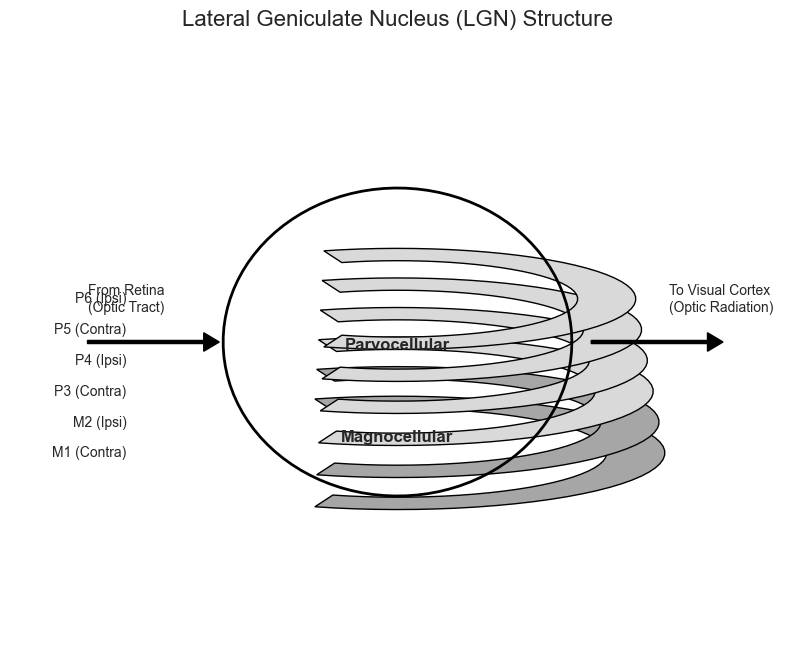

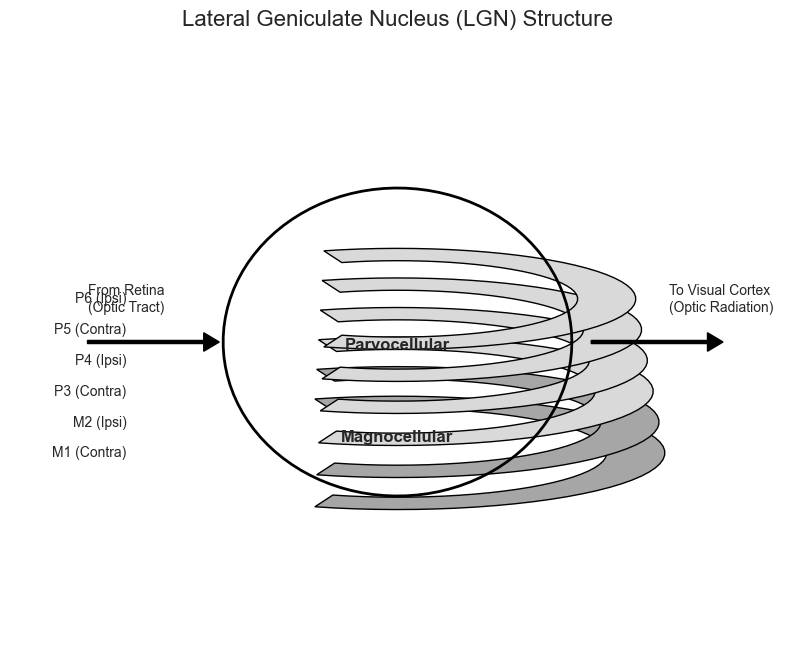

In [3]:
def draw_lgn_diagram():
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    # Draw LGN layers
    layer_colors = ['#a6a6a6', '#a6a6a6', '#d9d9d9', '#d9d9d9', '#d9d9d9', '#d9d9d9']
    layer_names = ['M1 (Contra)', 'M2 (Ipsi)', 'P3 (Contra)', 'P4 (Ipsi)', 'P5 (Contra)', 'P6 (Ipsi)']
    
    # Draw a rounded shape for the LGN
    theta = np.linspace(0, 2*np.pi, 100)
    r1 = 1.5  # horizontal radius
    r2 = 2.5  # vertical radius
    x_center = 5
    y_center = 5
    x = x_center + r1 * np.cos(theta) * 1.5  # elongate horizontally
    y = y_center + r2 * np.sin(theta)
    ax.plot(x, y, 'k-', linewidth=2)
    
    # Draw internal layers
    for i, (color, name) in enumerate(zip(layer_colors, layer_names)):
        # Create curved layers within the LGN
        height = 0.5
        center_y = 3.2 + i * height
        
        # Draw a curved shape for each layer
        theta_range = np.linspace(-0.6*np.pi, 0.6*np.pi, 50)  # partial arc
        r_inner = 1.8 - i * 0.05  # adjust scale for perspective
        r_outer = r_inner + height
        
        # Inner arc
        x_inner = x_center + r_inner * np.cos(theta_range) * 1.5
        y_inner = center_y + r_inner * np.sin(theta_range) * 0.4
        
        # Outer arc
        x_outer = x_center + r_outer * np.cos(theta_range) * 1.5
        y_outer = center_y + r_outer * np.sin(theta_range) * 0.4
        
        # Connect the arcs
        x_fill = np.concatenate([x_inner, x_outer[::-1], [x_inner[0]]])
        y_fill = np.concatenate([y_inner, y_outer[::-1], [y_inner[0]]])
        
        ax.fill(x_fill, y_fill, color=color, edgecolor='k', linewidth=1)
        
        # Add layer labels
        ax.text(x_center - 3.5, center_y, name, fontsize=10, ha='right', va='center')
    
    # Add pathway labels
    ax.text(x_center, 3.2 + 0.5 * 0.5, 'Magnocellular', fontsize=12, ha='center', va='center', weight='bold')
    ax.text(x_center, 3.2 + 3.5 * 0.5, 'Parvocellular', fontsize=12, ha='center', va='center', weight='bold')
    
    # Add arrows for input and output
    # From retina to LGN
    ax.arrow(1, 5, 1.5, 0, head_width=0.3, head_length=0.2, fc='k', ec='k', width=0.05)
    ax.text(1, 5.5, 'From Retina\n(Optic Tract)', fontsize=10)
    
    # From LGN to V1
    ax.arrow(7.5, 5, 1.5, 0, head_width=0.3, head_length=0.2, fc='k', ec='k', width=0.05)
    ax.text(8.5, 5.5, 'To Visual Cortex\n(Optic Radiation)', fontsize=10)
    
    ax.set_title('Lateral Geniculate Nucleus (LGN) Structure', fontsize=16)
    
    return fig

draw_lgn_diagram()

### Magnocellular vs. Parvocellular Pathways

The magnocellular (M) and parvocellular (P) pathways process distinct aspects of visual information and contribute differently to motion perception:

#### Magnocellular Pathway
- Specializes in detecting **motion and temporal changes**
- High **contrast sensitivity** (can detect small contrast differences)
- Low **spatial resolution** (less detail)
- High **temporal resolution** (can detect rapid changes)
- **Achromatic** (not color-sensitive)

#### Parvocellular Pathway
- Specializes in detecting **fine detail and color**
- Low **contrast sensitivity** (needs higher contrast to detect differences)
- High **spatial resolution** (more detail)
- Low **temporal resolution** (less sensitive to rapid changes)
- **Chromatic** (color-sensitive)

Let's compare the spatiotemporal response properties of M and P cells:

In [ ]:
# Define parameters for M and P cells
# Spatial receptive field
m_center_sigma = 5
m_surround_sigma = 15
p_center_sigma = 2
p_surround_sigma = 6

# Create receptive fields
rf_m = create_center_surround_rf(center_sigma=m_center_sigma, surround_sigma=m_surround_sigma, rf_type='ON')
rf_p = create_center_surround_rf(center_sigma=p_center_sigma, surround_sigma=p_surround_sigma, rf_type='ON')

# Temporal response
t = np.linspace(0, 20, 100)
m_temporal = temporal_filter(t, cell_type='transient')
p_temporal = temporal_filter(t, cell_type='sustained')

# Normalize
m_temporal = m_temporal / np.max(np.abs(m_temporal))
p_temporal = p_temporal / np.max(np.abs(p_temporal))

# Plot comparisons
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot spatial receptive fields
im1 = axs[0, 0].imshow(rf_m, cmap='RdBu_r')
axs[0, 0].set_title('M Cell Spatial Receptive Field')
axs[0, 0].axis('off')
plt.colorbar(im1, ax=axs[0, 0], fraction=0.046, pad=0.04)

im2 = axs[0, 1].imshow(rf_p, cmap='RdBu_r')
axs[0, 1].set_title('P Cell Spatial Receptive Field')
axs[0, 1].axis('off')
plt.colorbar(im2, ax=axs[0, 1], fraction=0.046, pad=0.04)

# Plot spatial cross-sections
center = rf_m.shape[0] // 2
axs[1, 0].plot(rf_m[center, :], 'm-', linewidth=2, label='M Cell')
axs[1, 0].plot(rf_p[center, :], 'g-', linewidth=2, label='P Cell')
axs[1, 0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axs[1, 0].set_title('Spatial Profile Comparison')
axs[1, 0].set_xlabel('Position')
axs[1, 0].set_ylabel('Response')
axs[1, 0].legend()

# Plot temporal responses
axs[1, 1].plot(t, m_temporal, 'm-', linewidth=2, label='M Cell')
axs[1, 1].plot(t, p_temporal, 'g-', linewidth=2, label='P Cell')
axs[1, 1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axs[1, 1].set_title('Temporal Response Comparison')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Response')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

### Contrast Sensitivity Functions

One way to characterize the difference between M and P pathways is through their contrast sensitivity functions (CSFs), which show how sensitive cells are to stimuli of different spatial and temporal frequencies. Let's simulate and visualize these functions:

In [ ]:
def contrast_sensitivity_function(spatial_freq, temporal_freq, cell_type='M'):
    """Compute contrast sensitivity as a function of spatial and temporal frequency."""
    if cell_type == 'M':
        # M cells: high sensitivity, peak at low spatial freq, high temporal freq
        spatial_peak = 1
        temporal_peak = 10
        spatial_width = 2
        temporal_width = 8
        sensitivity = 5
    else:  # P cells
        # P cells: lower sensitivity, peak at high spatial freq, low temporal freq
        spatial_peak = 7
        temporal_peak = 2
        spatial_width = 5
        temporal_width = 3
        sensitivity = 2
    
    # Compute response using a 2D Gaussian profile
    spatial_resp = np.exp(-((spatial_freq - spatial_peak) / spatial_width)**2)
    temporal_resp = np.exp(-((temporal_freq - temporal_peak) / temporal_width)**2)
    
    return sensitivity * spatial_resp * temporal_resp

# Compute contrast sensitivity over a range of spatial and temporal frequencies
spatial_freqs = np.linspace(0.1, 20, 50)
temporal_freqs = np.linspace(0.1, 20, 50)
SF, TF = np.meshgrid(spatial_freqs, temporal_freqs)

# Compute CSFs for M and P cells
csf_m = np.zeros_like(SF)
csf_p = np.zeros_like(SF)

for i in range(SF.shape[0]):
    for j in range(SF.shape[1]):
        csf_m[i, j] = contrast_sensitivity_function(SF[i, j], TF[i, j], cell_type='M')
        csf_p[i, j] = contrast_sensitivity_function(SF[i, j], TF[i, j], cell_type='P')

# Plot the CSFs
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# M cell CSF
im1 = axs[0].imshow(csf_m, extent=[spatial_freqs.min(), spatial_freqs.max(), 
                                temporal_freqs.min(), temporal_freqs.max()],
                  origin='lower', aspect='auto', cmap='viridis')
axs[0].set_title('M Cell Contrast Sensitivity')
axs[0].set_xlabel('Spatial Frequency')
axs[0].set_ylabel('Temporal Frequency')
plt.colorbar(im1, ax=axs[0])

# P cell CSF
im2 = axs[1].imshow(csf_p, extent=[spatial_freqs.min(), spatial_freqs.max(), 
                                temporal_freqs.min(), temporal_freqs.max()],
                  origin='lower', aspect='auto', cmap='viridis')
axs[1].set_title('P Cell Contrast Sensitivity')
axs[1].set_xlabel('Spatial Frequency')
axs[1].set_ylabel('Temporal Frequency')
plt.colorbar(im2, ax=axs[1])

# Dominant pathway (compare M vs P)
im3 = axs[2].imshow(csf_m - csf_p, extent=[spatial_freqs.min(), spatial_freqs.max(), 
                                       temporal_freqs.min(), temporal_freqs.max()],
                  origin='lower', aspect='auto', cmap='RdBu_r')
axs[2].set_title('Dominant Pathway (M - P)')
axs[2].set_xlabel('Spatial Frequency')
axs[2].set_ylabel('Temporal Frequency')
plt.colorbar(im3, ax=axs[2])

plt.tight_layout()
plt.show()

## 5. Implications for Motion Processing

Now that we've explored the retina and LGN, let's consider how these early visual structures contribute to motion processing.

### Magnocellular Pathway and Motion

The magnocellular pathway plays a critical role in motion perception for several reasons:

1. **Temporal sensitivity**: M cells respond well to temporal changes, making them sensitive to movement
2. **Fast processing**: The magnocellular pathway has faster conduction velocities, allowing rapid detection of motion
3. **Contrast sensitivity**: M cells can detect low-contrast moving stimuli effectively
4. **Projections**: The magnocellular pathway projects to areas of the visual cortex (particularly MT/V5) that specialize in motion processing

### Parvocellular Contributions

While the magnocellular pathway is most directly linked to motion perception, the parvocellular pathway also contributes:

1. **Fine detail**: P cells provide high spatial resolution information that can help with motion of detailed patterns
2. **Form perception**: The parvocellular pathway helps identify the shape and form of moving objects
3. **Color motion**: Motion of colored stimuli involves parvocellular inputs

### Spatiotemporal Processing

The retina and LGN begin the process of spatiotemporal filtering that is essential for motion detection. The center-surround receptive fields create spatial filtering, while the temporal response dynamics create temporal filtering. These spatiotemporal filters will be elaborated in the visual cortex to create fully direction-selective neurons.

Let's visualize how a simple motion stimulus is represented after passing through these early visual stages:

In [ ]:
def create_moving_edge_stimulus(size=64, frames=20, speed=2):
    """Create a stimulus with an edge moving from left to right."""
    stimulus = np.zeros((frames, size, size))
    
    for t in range(frames):
        edge_position = int(size/4 + speed * t)
        if edge_position < size:
            stimulus[t, :, edge_position:] = 1.0
    
    return stimulus

def apply_spatiotemporal_filter(stimulus, rf_spatial, rf_temporal):
    """Apply a spatiotemporal filter to a 3D stimulus."""
    frames, height, width = stimulus.shape
    
    # First apply spatial filtering at each time point
    spatial_response = np.zeros_like(stimulus)
    for t in range(frames):
        spatial_response[t] = signal.convolve2d(stimulus[t], rf_spatial, mode='same', boundary='symm')
    
    # Then apply temporal filtering to each spatial position
    temporal_response = np.zeros_like(spatial_response)
    for y in range(height):
        for x in range(width):
            # Extract time course at this spatial position
            time_course = spatial_response[:, y, x]
            
            # Apply temporal filter through convolution
            temp_resp = np.zeros_like(time_course)
            for t in range(frames):
                for dt in range(min(t+1, len(rf_temporal))):
                    temp_resp[t] += time_course[t-dt] * rf_temporal[dt]
            
            temporal_response[:, y, x] = temp_resp
    
    return temporal_response

# Create a moving edge stimulus
stimulus = create_moving_edge_stimulus(size=32, frames=20, speed=2)

# Create spatial and temporal filters for M and P cells
rf_m_spatial = create_center_surround_rf(size=32, center_sigma=m_center_sigma, surround_sigma=m_surround_sigma, rf_type='ON')
rf_p_spatial = create_center_surround_rf(size=32, center_sigma=p_center_sigma, surround_sigma=p_surround_sigma, rf_type='ON')

t_short = np.linspace(0, 10, 20)
rf_m_temporal = temporal_filter(t_short, cell_type='transient')
rf_p_temporal = temporal_filter(t_short, cell_type='sustained')

# Normalize
rf_m_temporal = rf_m_temporal / np.sum(np.abs(rf_m_temporal))
rf_p_temporal = rf_p_temporal / np.sum(np.abs(rf_p_temporal))

# Apply filters to the stimulus
m_response = apply_spatiotemporal_filter(stimulus, rf_m_spatial, rf_m_temporal)
p_response = apply_spatiotemporal_filter(stimulus, rf_p_spatial, rf_p_temporal)

# Visualize the stimulus and responses at a few time points
time_points = [0, 5, 10, 15]
fig, axs = plt.subplots(3, len(time_points), figsize=(15, 9))

for i, t in enumerate(time_points):
    # Original stimulus
    axs[0, i].imshow(stimulus[t], cmap='gray')
    axs[0, i].set_title(f'Time {t}')
    axs[0, i].axis('off')
    
    # M cell response
    im1 = axs[1, i].imshow(m_response[t], cmap='RdBu_r', vmin=-0.1, vmax=0.1)
    axs[1, i].set_title(f'M Cell Response')
    axs[1, i].axis('off')
    
    # P cell response
    im2 = axs[2, i].imshow(p_response[t], cmap='RdBu_r', vmin=-0.1, vmax=0.1)
    axs[2, i].set_title(f'P Cell Response')
    axs[2, i].axis('off')

# Add row labels
axs[0, 0].set_ylabel('Stimulus', fontsize=12)
axs[1, 0].set_ylabel('M Cell', fontsize=12)
axs[2, 0].set_ylabel('P Cell', fontsize=12)

# Add colorbars
plt.colorbar(im1, ax=axs[1, -1], fraction=0.046, pad=0.04)
plt.colorbar(im2, ax=axs[2, -1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

## 6. From Retina/LGN to the Visual Cortex

After processing in the LGN, visual information is sent to the primary visual cortex (V1) via the optic radiation. The magnocellular and parvocellular pathways remain largely segregated in their projections to V1, with M-cells projecting primarily to layer 4Cα and P-cells to layer 4Cβ.

In the next section, we'll explore how the visual cortex builds upon these early representations to create more complex receptive fields, including those with orientation and direction selectivity - crucial properties for motion perception.

The key concepts to remember from this section are:

1. **Center-surround organization**: Retinal ganglion cells have center-surround receptive fields that detect local contrast
2. **Temporal dynamics**: Retinal cells have specific temporal response properties, with some cells responding transiently and others in a sustained fashion
3. **Magnocellular pathway**: Specialized for motion processing with high temporal sensitivity and low spatial resolution
4. **Parvocellular pathway**: Specialized for form and color processing with high spatial resolution
5. **Spatiotemporal filtering**: The retina and LGN begin the process of spatiotemporal filtering that is essential for motion detection

## Summary

In this notebook, we've explored the earliest stages of visual processing in the retina and LGN. We've seen how these structures convert light into neural signals and begin the process of feature extraction.

Key takeaways:

1. The retina has a complex structure with multiple cell types that transform light into neural signals
2. Retinal ganglion cells have center-surround receptive fields that enhance local contrast
3. The temporal response properties of retinal cells can be categorized as sustained or transient
4. The LGN has magnocellular and parvocellular pathways with different spatial and temporal properties
5. The magnocellular pathway plays a crucial role in motion perception due to its high temporal sensitivity

In the next section (02_receptive_fields), we'll explore how these retinal and LGN inputs are integrated in the primary visual cortex (V1) to form more complex receptive fields that are sensitive to orientation and spatial frequency.

## Additional Resources

If you're interested in learning more about the retina and LGN, here are some resources to check out:

### Papers and Books
- Masland, R. H. (2012). The neuronal organization of the retina. *Neuron*, 76(2), 266-280.
  - Excellent overview of retinal organization
- Callaway, E. M. (2005). Structure and function of parallel pathways in the primate early visual system. *Journal of Physiology*, 566(1), 13-19.
  - Concise review of magnocellular and parvocellular pathways
- Rodieck, R. W. (1998). *The First Steps in Seeing*. Sinauer Associates.
  - Comprehensive book on early visual processing

### Online Resources
- [Webvision: The Organization of the Retina and Visual System](https://webvision.med.utah.edu/)
  - Detailed online resource about the retina
- [Khan Academy: Light and Dark Adaptation](https://www.khanacademy.org/science/biology/human-biology/sight/v/light-and-dark-adaptation)
  - Accessible explanations of retinal physiology